In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
pylab.rcParams['figure.figsize'] = (20, 20)

In [3]:
tparam_training = pd.read_csv('training/zhongzhi_timevarying_param_train.csv',
    names=['product_no', 'y', 'tparam', 'value', 'time'])


In [4]:
tparam_training.loc[tparam_training.y > 0.85].to_csv('training/tparam_new.csv'
                                                     ,header=False, index=False)

KeyboardInterrupt: 

In [7]:
def extract_product_no(df, num):
    """extract specific product_no in tparam."""
    df_num = df.loc[df.product_no == num].sort_values(by='time')
    if not df_num.empty:
        df_num['time'] = df_num['time'].apply(
            lambda x: pd.to_datetime(x, errors='coerce'))
        return df_num
    else:
        return 0

def plot_tparams(df):
    for param in ['tparam' + str(i) for i in range(1,19)]:
        # print(param)
        selected_param = df.loc[df.tparam == param]
        if not selected_param.empty:
            selected_param.plot(x='mins', y='value', label=param)
    return 0


def cal_time_delta(df):
    time0 = df.iloc[0,:].time
    df['time_delta'] = df['time'].apply(lambda x: x - time0)
    return df


def add_time_mins(df):
    df['mins'] = df['time_delta'].astype('timedelta64[m]')
    return df



In [6]:
tparam_training

,product_no,y,tparam,value,time
0,45,0.96759,tparam3,20.41489,2016-07-02 16:32:36
1,45,0.96759,tparam3,21.11513,2016-07-02 14:58:51
2,45,0.96759,tparam2,21.65640,2016-07-02 15:36:57
3,45,0.96759,tparam10,1038.38782,2016-07-02 10:45:39
4,45,0.96759,tparam9,1806.15710,2016-07-02 14:40:48
5,45,0.96759,tparam15,120.37910,2016-07-02 10:23:35
6,45,0.96759,tparam4,21.01851,2016-07-02 12:15:54
7,45,0.96759,tparam9,1733.84106,2016-07-02 11:32:47
8,45,0.96759,tparam9,1727.56787,2016-07-02 11:17:45
9,45,0.96759,tparam1,7.56171,2016-07-02 10:41:38


In [8]:
param_training = pd.read_csv('training/zhongzhi_param_data_train.csv')
# use pd.read_table() to read from tab-separated files.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html


draft_training = pd.read_csv('training/zhongzhi_draft_data_train.csv')
# use pd.read_table() to read from tab-separated files.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html

param_test = pd.read_csv('test/zhongzhi_param_data_test_new.csv')
# use pd.read_table() to read from tab-separated files.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html


draft_test = pd.read_csv('test/zhongzhi_draft_data_test_new.csv')

In [9]:
training_set = pd.merge(draft_training, param_training, on=['product_no'])

test_set = pd.merge(draft_test, param_test, on=['product_no'])


In [10]:
training_set = training_set.loc[training_set.key_index_x>0.85]

In [15]:
train_no_list = training_set.product_no.tolist()

In [16]:
def extract_product_no_save(df, num):
    """extract specific product_no in tparam."""
    df_num = df.loc[df.product_no == num].sort_values(by='time')
    if not df_num.empty:
        df_num['time'] = df_num['time'].apply(
            lambda x: pd.to_datetime(x, errors='coerce'))
        df_num.to_csv('training/tparams/' + str(num) + '.csv'
                     i ,header=False, index=False)

In [18]:
for no in train_no_list:
    extract_product_no_save(tparam_training, no)
    

In [ ]:

tparam_223 = extract_product_no(tparam_training, 223)
add_time_mins(cal_time_delta(tparam_223))

In [ ]:
tparam_11638 = extract_product_no(tparam_training, 931)
add_time_mins(cal_time_delta(tparam_11638))

In [ ]:
tparam_11638

In [ ]:
plot_tparams(tparam_11638)

In [ ]:
plot_tparams(tparam_223)

In [ ]:
df = pd.concat([tparam_223.loc[tparam_223.tparam == 'tparam2'].drop_duplicates(subset='mins', keep='last'),
                tparam_11638.loc[tparam_11638.tparam == 'tparam2'].drop_duplicates(subset='mins', keep='last')])

In [ ]:
df

In [ ]:
df.pivot(index='mins', columns='product_no', values='value').plot()

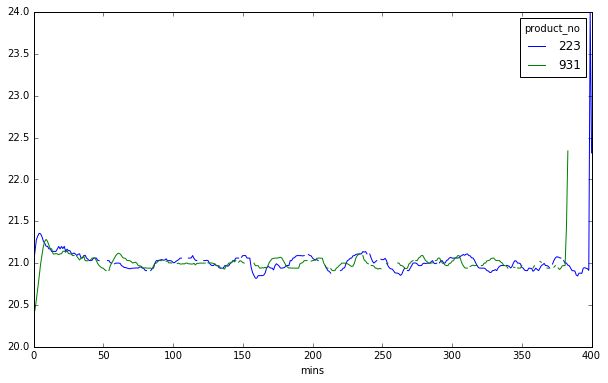

In [46]:
def plot_param_compare(param):
    df = pd.concat([tparam_223.loc[tparam_223.tparam == param].drop_duplicates(subset='mins', keep='last'),
                tparam_11638.loc[tparam_11638.tparam == param].drop_duplicates(subset='mins', keep='last')])
    df.pivot(index='mins', columns='product_no', values='value').plot()
pylab.rcParams['figure.figsize'] = (10, 6)
plot_param_compare('tparam3')

In [ ]:
for param in ['tparam' + str(i) for i in range(1,19)]:
    try:
        plot_param_compare(param)
    except TypeError:
        pass

0

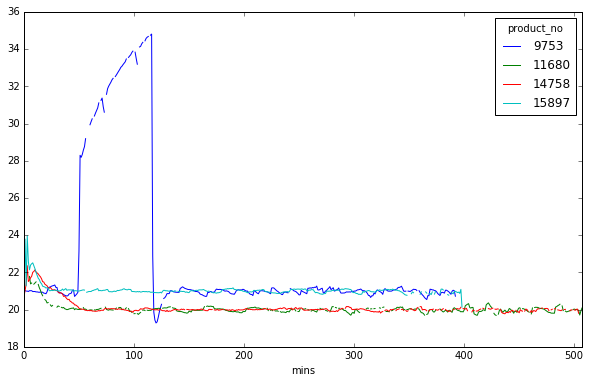

In [51]:
def plot_some_no(product_no_list):
    df_list = []
    for product_no in product_no_list:
        df = extract_product_no(tparam_training, product_no)
        df_list.append(add_time_mins(cal_time_delta(df)))
    param='tparam4'
    concat_df = pd.concat([df.loc[df.tparam==param].drop_duplicates(subset='mins', keep='last') 
                           for df in df_list])
    concat_df.pivot(index='mins', columns='product_no', values='value').plot()
    
    return 0

plot_some_no([15897, 14758, 11680, 9753])


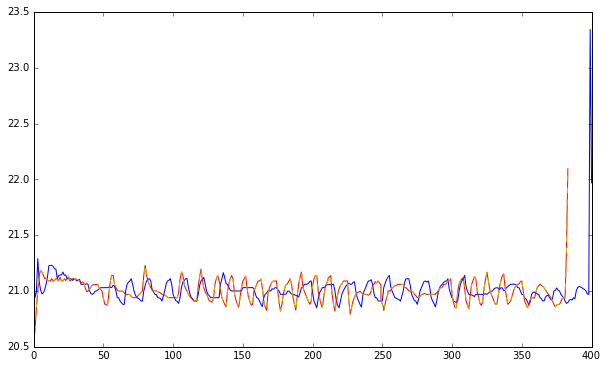

In [57]:
plt.plot(tparam_223.loc[tparam_223.tparam == 'tparam2'].mins, tparam_223.loc[tparam_223.tparam == 'tparam2'].value, 'b',
        tparam_11638.loc[tparam_11638.tparam == 'tparam2'].mins, tparam_11638.loc[tparam_11638.tparam == 'tparam2'].value, 'r',
        )
plt.plot(tparam_11638.loc[tparam_11638.tparam == 'tparam2'].mins, tparam_11638.loc[tparam_11638.tparam == 'tparam2'].value, 'y--',
        )

In [18]:
prod_no_dict = {}  # init prod_no_dict

for no in top50 + least50:
    prod_no_dict[no] = extract_product_no(tparam_training, no)


In [ ]:
for no in prod_no_dict:
    print(type(prod_no_dict[no]))

In [37]:
top50 = [14738, 15638, 4586, 5885, 3606, 18644, 3415, 7516, 11638, 
         9714, 6477, 13265, 15705, 4466, 2816, 15740, 11894, 16718, 
         8739, 4951, 8974, 17509, 9240, 10004, 5206, 13555, 15269, 
         11728, 12233, 3578, 12582, 181, 10729, 13117, 17917, 13855, 
         2514, 18336, 10993, 15827, 6612, 13293, 9110, 6530, 7991, 9238, 
         16889, 931, 12759, 14966]
least50 = [11648, 18079, 9362, 11539, 5833, 11356, 3003, 8876, 9305, 
           15672, 6436, 9425, 6458, 15360, 3169, 10856, 5031, 2058, 6886, 
           16037, 13074, 10250, 2708, 15999, 13889, 17807, 11023, 885, 
           18490, 18262, 14182, 2721, 1200, 9129, 13890, 7388, 887, 8913, 
           15882, 17048, 14703, 18259, 11790, 5054, 2710, 11713, 3885, 
           9753, 15912, 6636]

middle50 = [15391, 18175, 4510, 11304, 3371, 15597, 7105, 11440, 13917, 
            3936, 16927, 6089, 10842, 12992, 10012, 8083, 18292, 7055, 
            9529, 10169, 4464, 18165, 2740, 11825, 18075, 16681, 7926, 
            6049, 637, 16410, 122, 9936, 13182, 14706, 11227, 7512, 7944, 
            1689, 3523, 2642, 3110, 12660, 10099, 15169, 7100, 6347, 
            6579, 2972, 6814, 12973]

In [38]:
for no in middle50:
    prod_no_dict[no] = extract_product_no(tparam_training, no)

In [39]:


def plot_single_param(prod_no, tparam, color):
    df_no = prod_no_dict[prod_no]
    if type(df_no) != int:
        df_no = add_time_mins(cal_time_delta(df_no))
        # print(df_no)
        plt.plot(df_no.loc[df_no.tparam == tparam].mins, 
                 df_no.loc[df_no.tparam == tparam].value, 
                 color)


def plot_all_param(param):
    for num in top50:
        plot_single_param(num, param, 'b')
    for num in least50:
        plot_single_param(num, param, 'r')
    for num in middle50:
        plot_single_param(num, param, 'g')


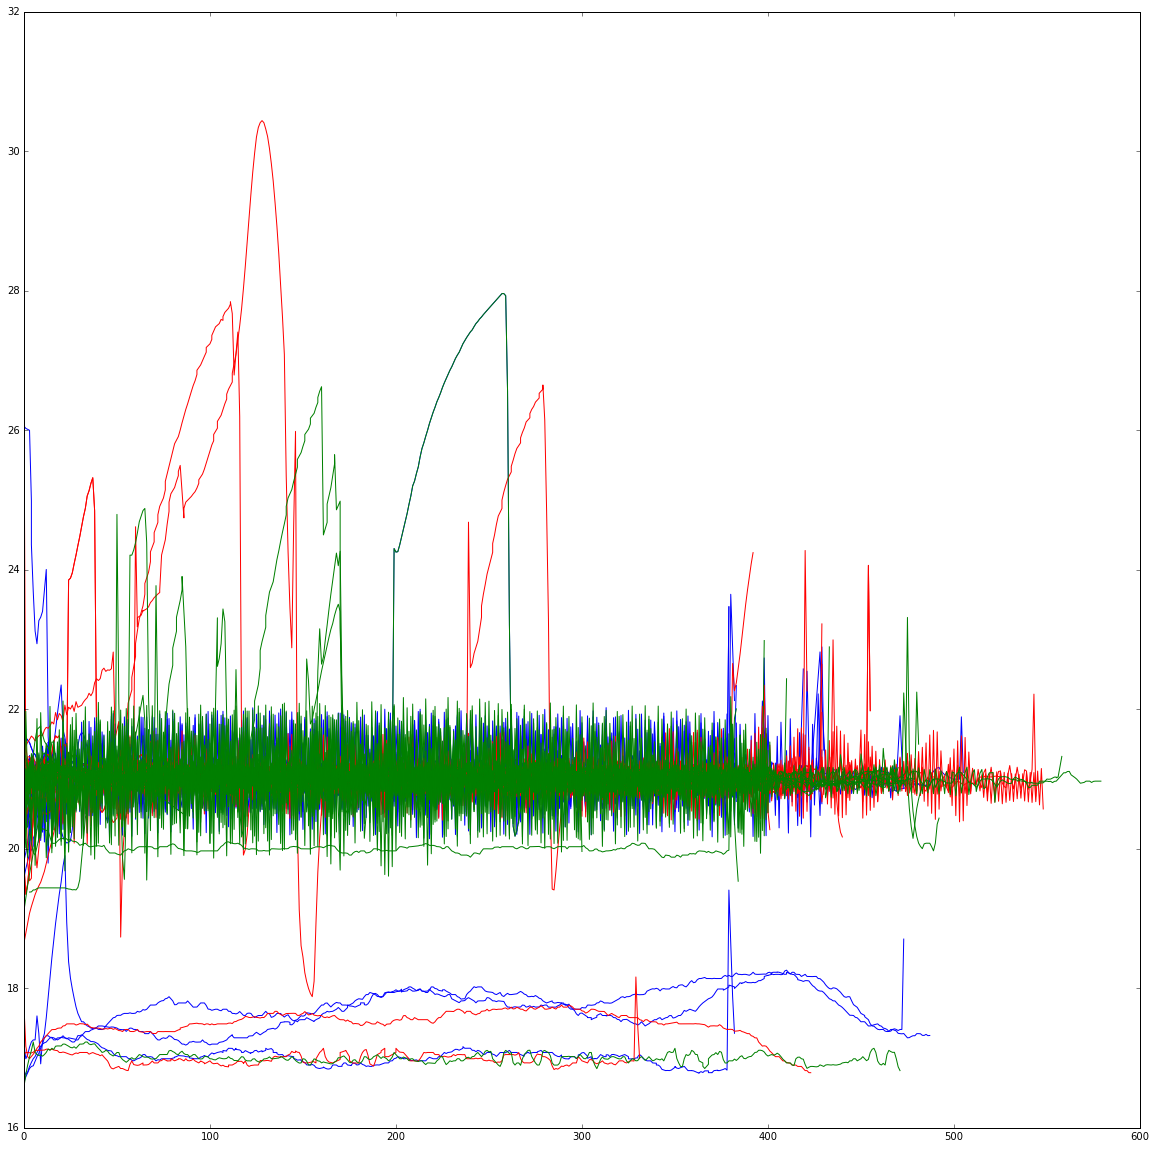

In [42]:
plt.clf()
param = 'tparam3'
plot_all_param(param)
plt.savefig(param + '.png')

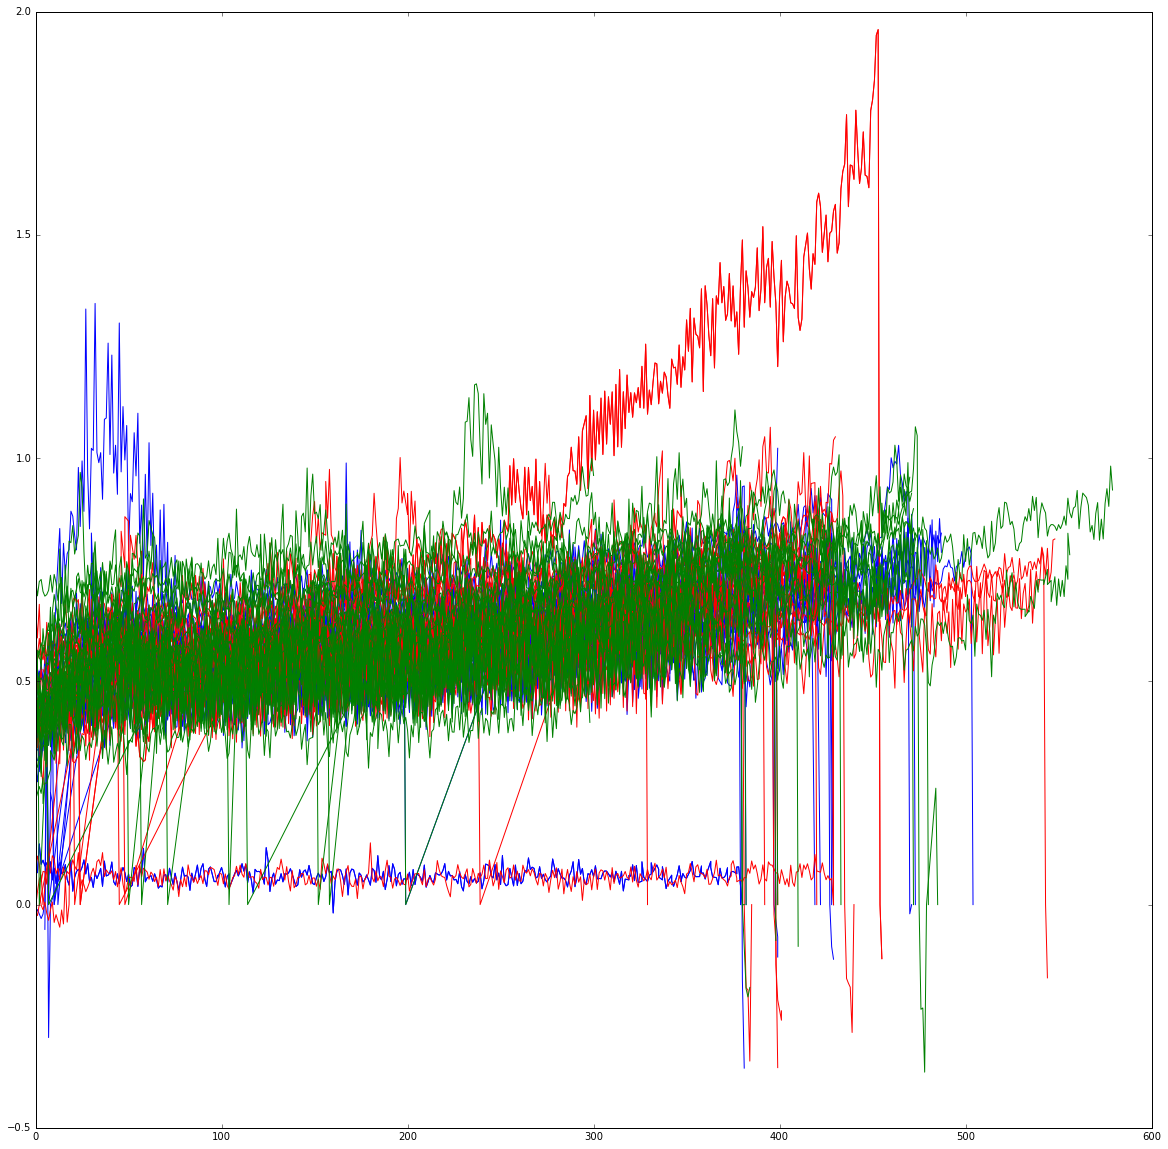

In [44]:
def save_fig_tparam(param):
    plt.clf()
    plot_all_param(param)
    plt.savefig(param + '.png')
save_fig_tparam('tparam15')
save_fig_tparam('tparam14')
save_fig_tparam('tparam13')
save_fig_tparam('tparam12')
save_fig_tparam('tparam11')
save_fig_tparam('tparam10')
save_fig_tparam('tparam9')
save_fig_tparam('tparam8')
save_fig_tparam('tparam7')

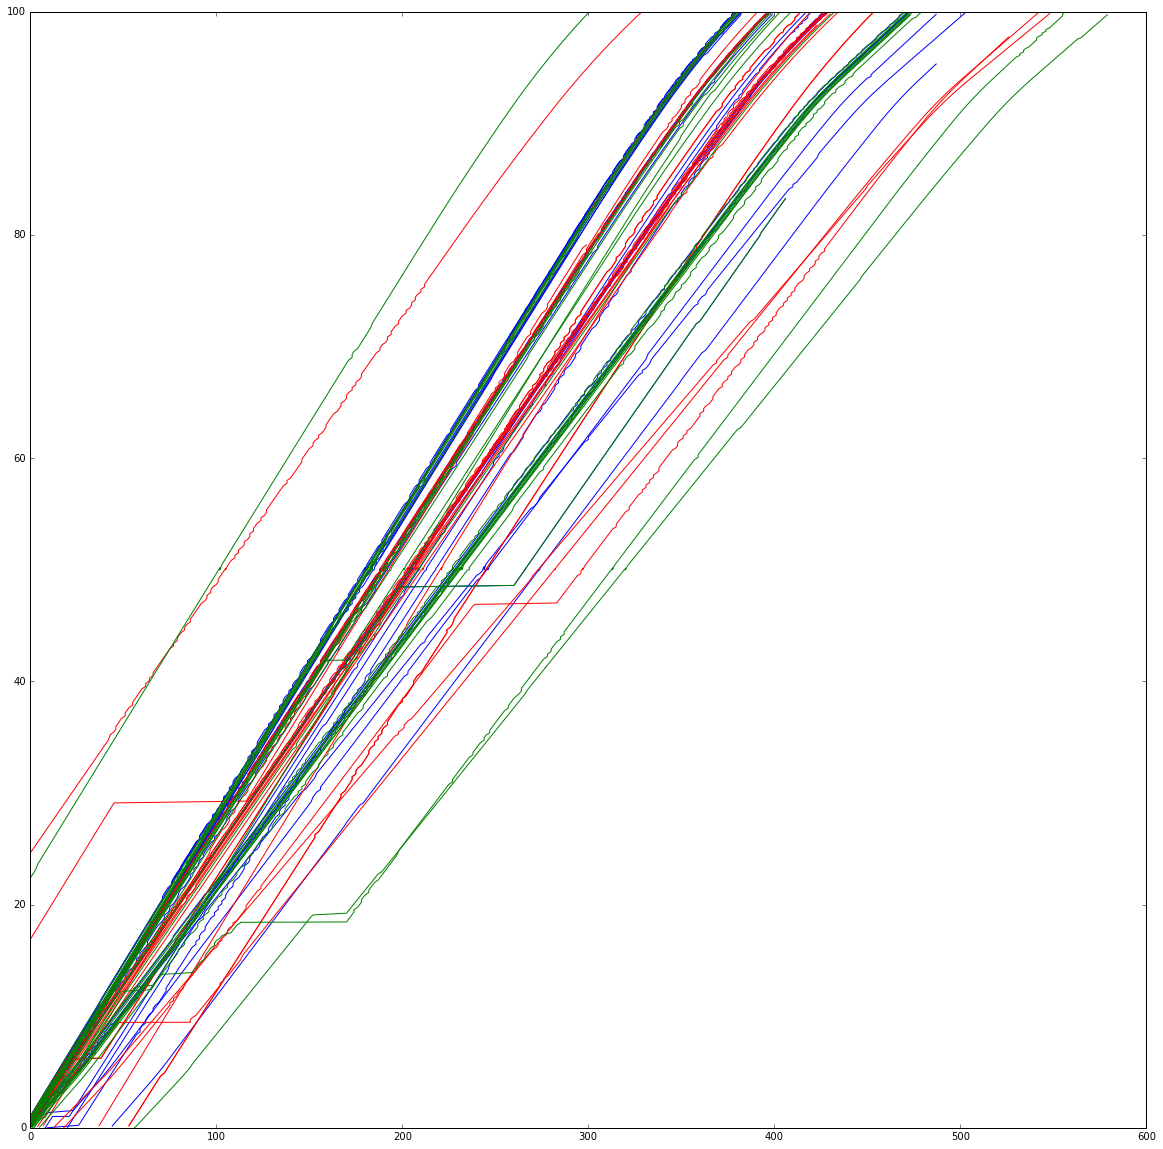

In [45]:

save_fig_tparam('tparam6')
save_fig_tparam('tparam4')
save_fig_tparam('tparam1')